### Risk score

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.concat([pd.read_stata(f"{data_paths['atlas']}/hs12_country_country_product_year_4_2012_2016.dta"),
                pd.read_stata(f"{data_paths['atlas']}/hs12_country_country_product_year_4_2017_2021.dta"),
                pd.read_stata(f"{data_paths['atlas']}/hs12_country_country_product_year_4_2022.dta")])
products = pd.read_csv(f"{data_paths['atlas']}/product_hs12.csv", dtype={"code": str})
countries = pd.read_csv(f"{data_paths['atlas']}/location_country.csv")
regions = pd.read_csv(f"{data_paths['atlas']}/location_group_member.csv")

$$
r = g + (\alpha * (1-g))^{log(\frac{N}{N-n+1})}
$$

$$
r = (g+\alpha*(1-g))^{(\beta * \frac{n}{N})}
$$

In [4]:
alpha=0.25
beta=50
risk_zones = (0.4,0.6)
N = 228

''

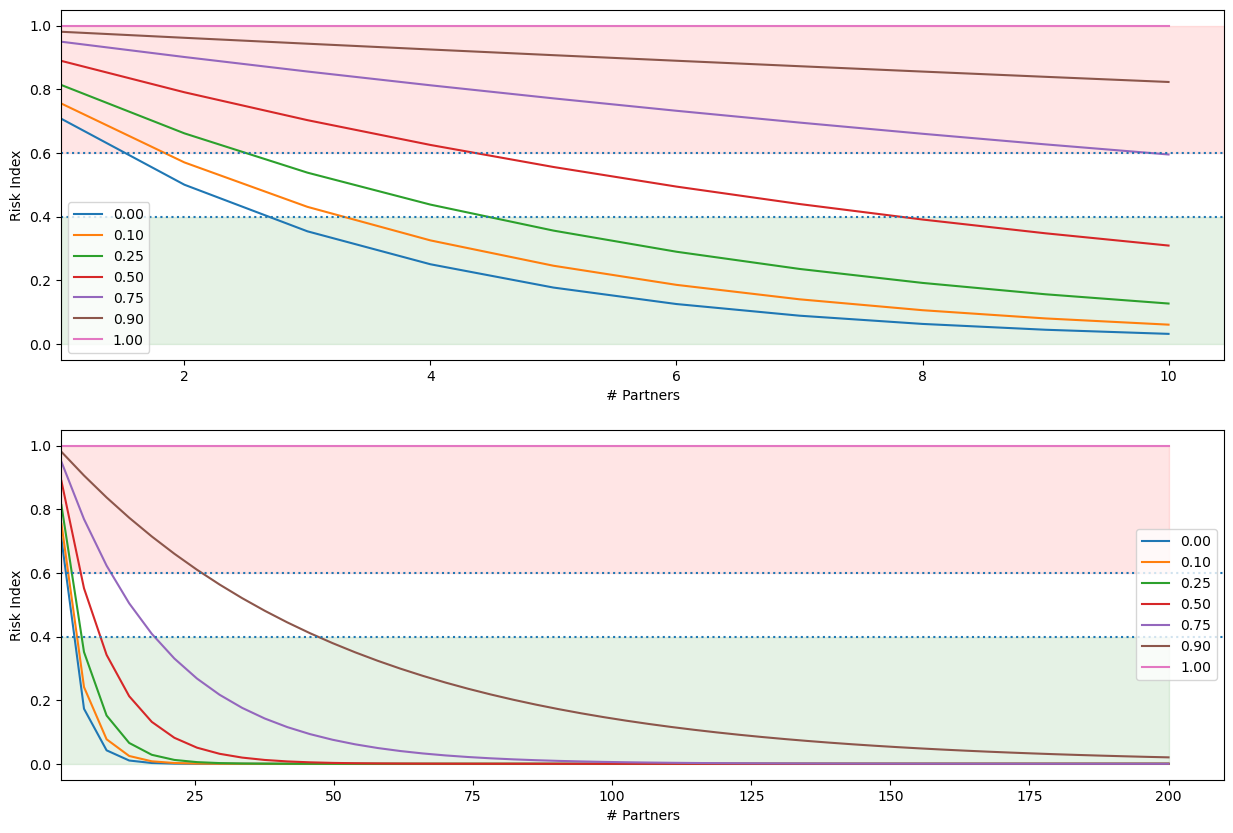

In [5]:
fig, ax = plt.subplots(2,1, figsize=(15,10))
Xshort = np.linspace(1, 10, 10)
Xlong = np.linspace(1, 200, 50)
G = [0, 0.1,0.25,0.5,0.75,0.9, 1]

for g in G:
    #yshort = [gini_to_risk(g, n, N, alpha=alpha) for n in Xshort]
    ylong = [gini_to_risk(g=g, n=n, N=200, alpha=alpha, beta=beta) for n in Xlong]
    yshort = [gini_to_risk(g=g, n=n, N=200, alpha=alpha, beta=beta) for n in Xshort]
    #ylong = [gini_to_risk(g=g, n=n, N=200, alpha=0.05, beta=5, lambda_=lambda_) for n in Xlong]
    #ylong2 = [gini_to_risk(g=g, n=n, N=200, alpha=0.5, beta=beta) for n in Xlong]
    sns.lineplot(x=Xshort, y=yshort, ax=ax[0], label=f"{g:.2f}")
    sns.lineplot(x=Xlong, y=ylong, ax=ax[1], label=f"{g:.2f}")
    #sns.lineplot(x=Xlong, y=ylong2, ax=ax[1], label=f"{g:.2f}", linestyle="--")
    
for i in range(2):
    ax[i].set_ylabel("Risk Index")
    ax[i].set_xlabel("# Partners")
    #ax[i].legend(title="Gini Coef.", ncols=5)
    ax[i].set_xlim(1)
    ax[i].axhline(risk_zones[0], linestyle=":")
    ax[i].fill_between(Xlong, y1=risk_zones[0], alpha=0.1, color="green")
    ax[i].axhline(risk_zones[1], linestyle=":")
    ax[i].fill_between(Xlong, y1=risk_zones[1], y2=1, alpha=0.1, color="red")

ax[1].legend()
;

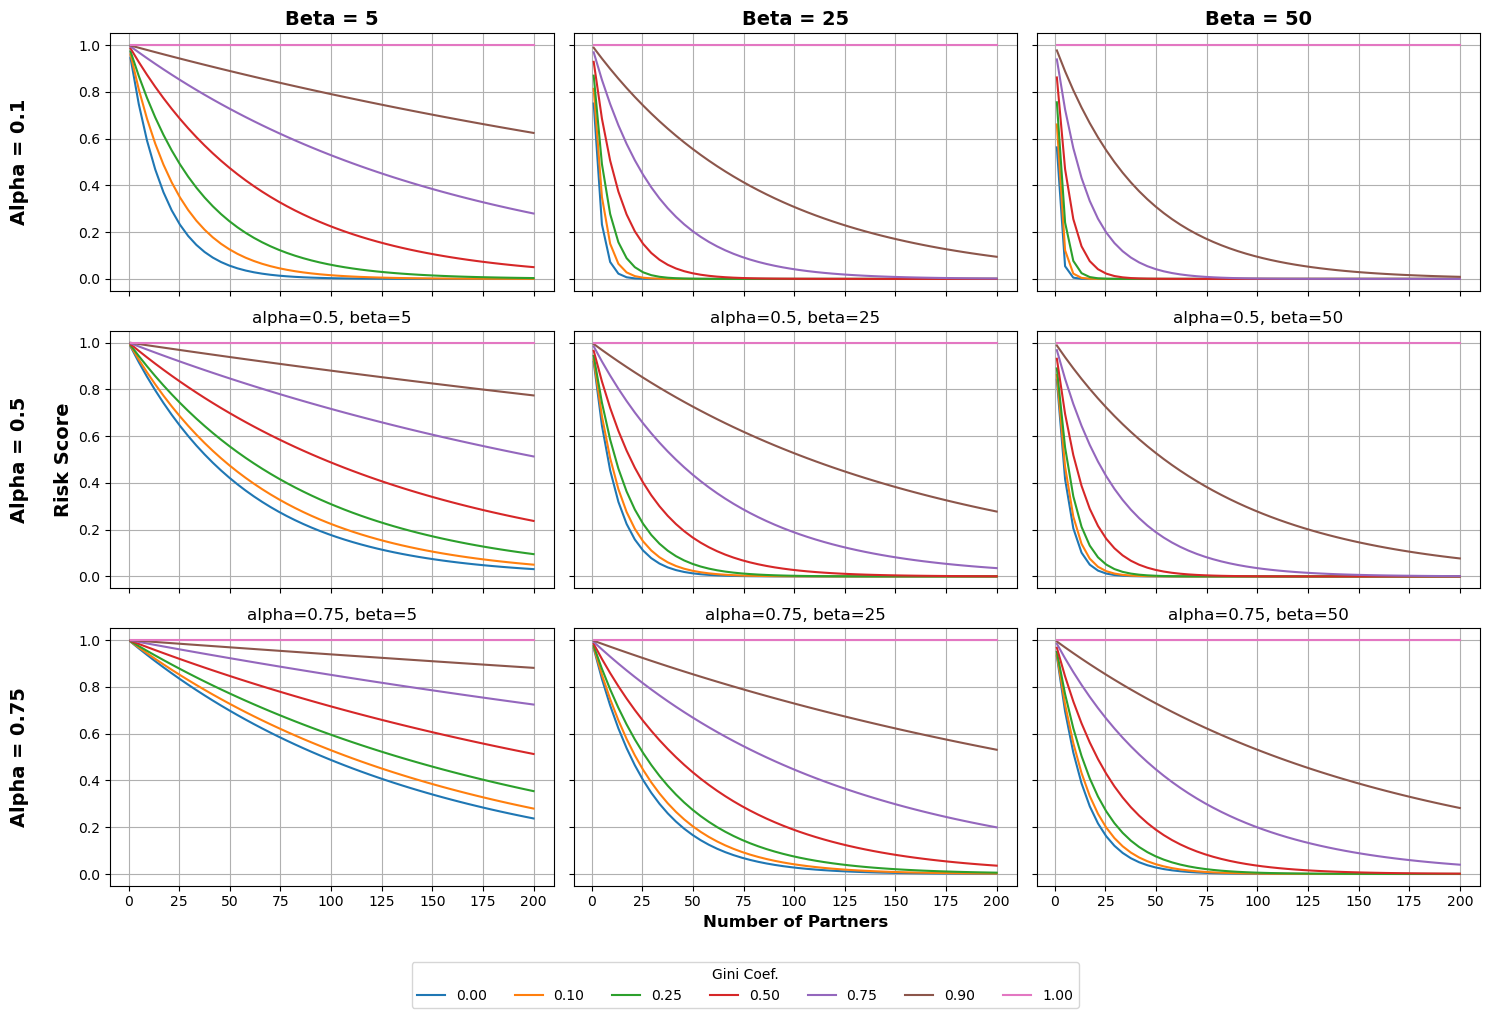

In [6]:
risk_zones = (0.4,0.6)
N = 228
Xlong = np.linspace(1, 200, 50)
g_values = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]

fig, ax = plt.subplots(3,3, figsize=(15,10), sharex=True, sharey=True)
ax_x = 0
ax_y = 0

for ax_x, alpha in enumerate([0.1, 0.5, 0.75]):
    for ax_y, beta in enumerate([5, 25, 50]):
        for g in g_values:
            ylong = [gini_to_risk(g=g, n=n, N=200, alpha=alpha, beta=beta) for n in Xlong]
            sns.lineplot(x=Xlong, y=ylong, ax=ax[ax_x][ax_y], label=f"{g:.2f}")
        ax[ax_x][ax_y].set_title(f"alpha={alpha}, beta={beta}")
        ax[ax_x][ax_y].grid()

        # Set Beta as column titles
        if ax_x == 0:
            ax[ax_x][ax_y].set_title(f"Beta = {beta}", fontsize=14, fontweight='bold')
        elif ax_x == 1:
            ax[ax_x][0].set_ylabel(f"Alpha = {alpha}\n\nRisk Score", fontsize=14, fontweight='bold')
        elif ax_x == 2:
            ax[ax_x][1].set_xlabel("Number of Partners", fontsize=12, fontweight='bold')

        # Set Alpha as row labels
        if ax_y == 0:
            ax[ax_x][ax_y].set_ylabel(f"Alpha = {alpha}\n\n", fontsize=14, fontweight='bold')
        else:
            ax[ax_x][ax_y].set_ylabel("")
        
        ax[ax_x][ax_y].grid(True)

# Remove duplicate legends and create a single legend at the bottom
handles, labels = ax[0][0].get_legend_handles_labels()

fig.legend(handles, labels, title="Gini Coef.", loc='lower center', ncol=len(g_values), bbox_to_anchor=(0.5, -0.02))

# Remove individual subplot legends
for axs in ax.flat:
    axs.get_legend().remove()

plt.tight_layout(rect=[0, 0.05, 1, 1])  # make room for the legend
plt.show();

### On real data

In [7]:
# Include product code
subset = df.merge(products[["product_id", "code"]], how="left", on="product_id")
subset.rename(columns={"code": "product_code"}, inplace=True)

product_code = "71"
subset["product_code"] = subset.product_code.str[:len(product_code)]

subset = subset[(subset.product_code == product_code)]

In [8]:
# Define the plot range
gini_range = np.linspace(0, 1, 100)
partner_range = np.linspace(0, 228, 100)

# Create a meshgrid
G, N_partners = np.meshgrid(gini_range, partner_range)

# Compute risk values
Risk = gini_to_risk(G, N_partners, N, alpha, beta)

# Define risk zones
risk_zones = [0.4, 0.6]  # Adjust based on your data

# Apply risk labels
Risk_labels = np.vectorize(lambda r: risk_label(r, risk_zones))(Risk)

# Create a color mapping for the labels
colors = {"Diversified": "lightgreen", "Moderate": "gold", "Highly Dependent": "red"}

c:\Users\ginof\anaconda3\envs\thesis\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ginof\anaconda3\envs\thesis\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ginof\anaconda3\envs\thesis\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ginof\anaconda3\envs\thesis\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

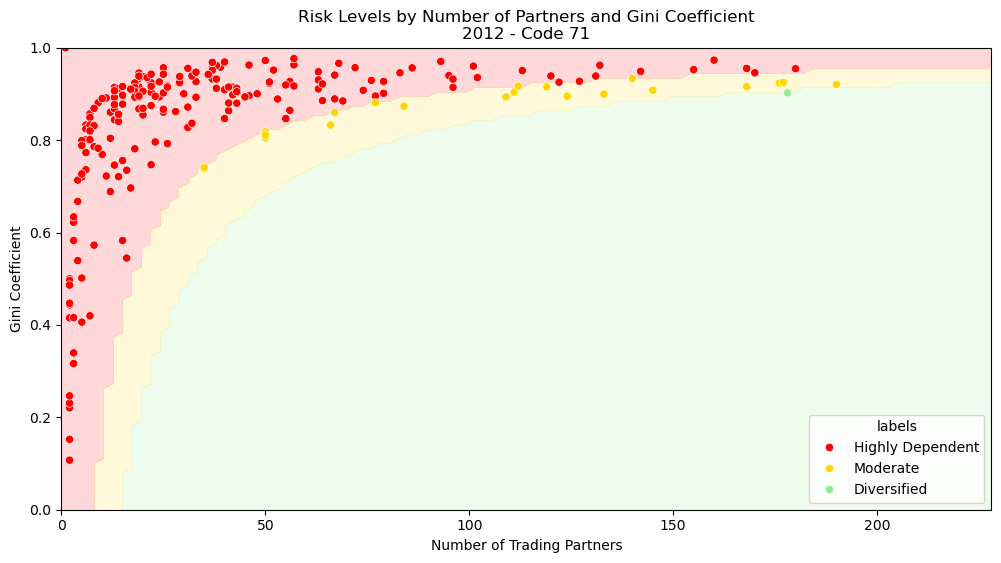

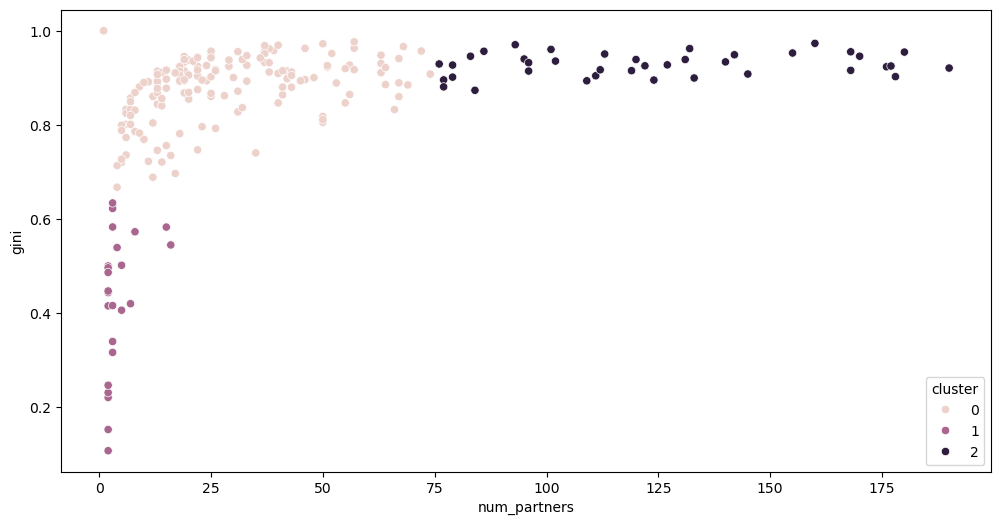

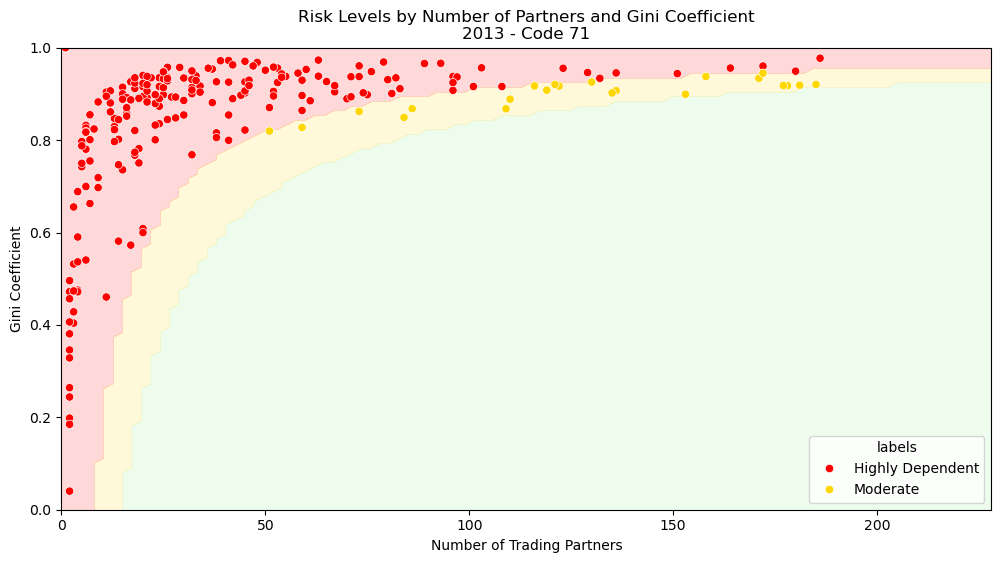

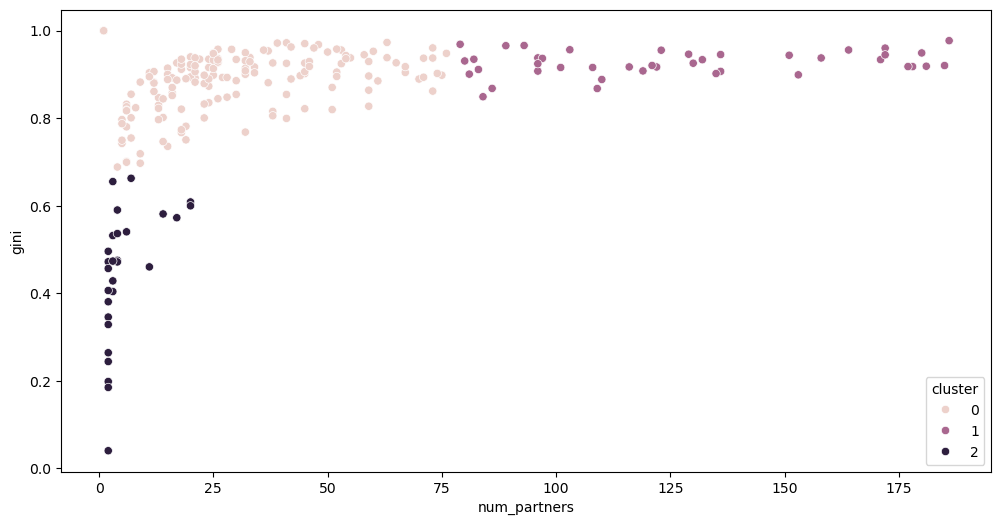

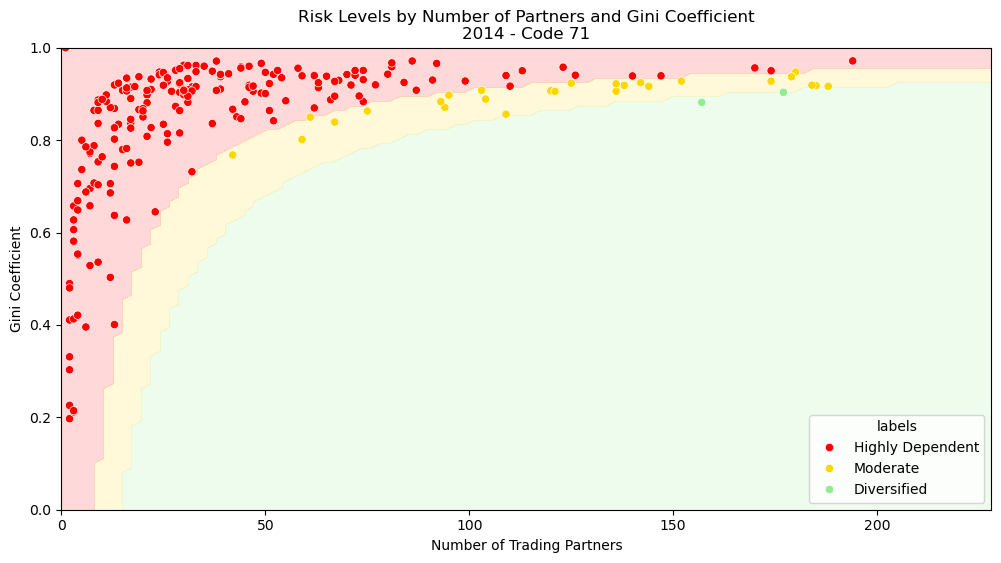

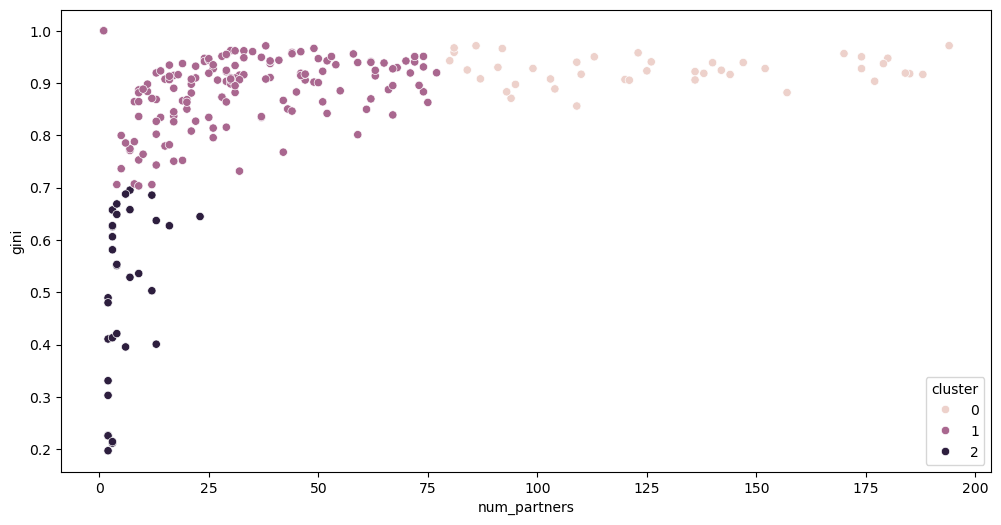

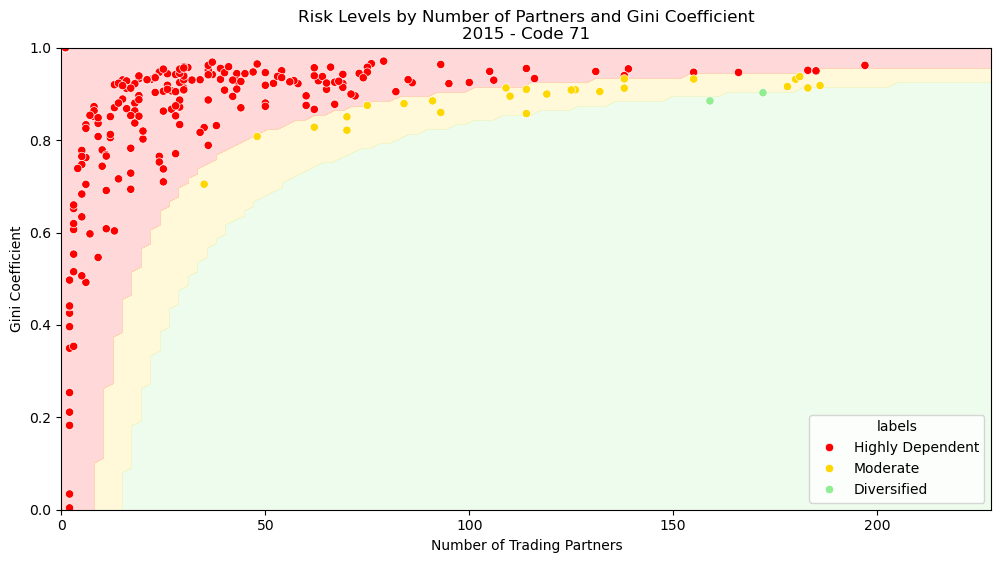

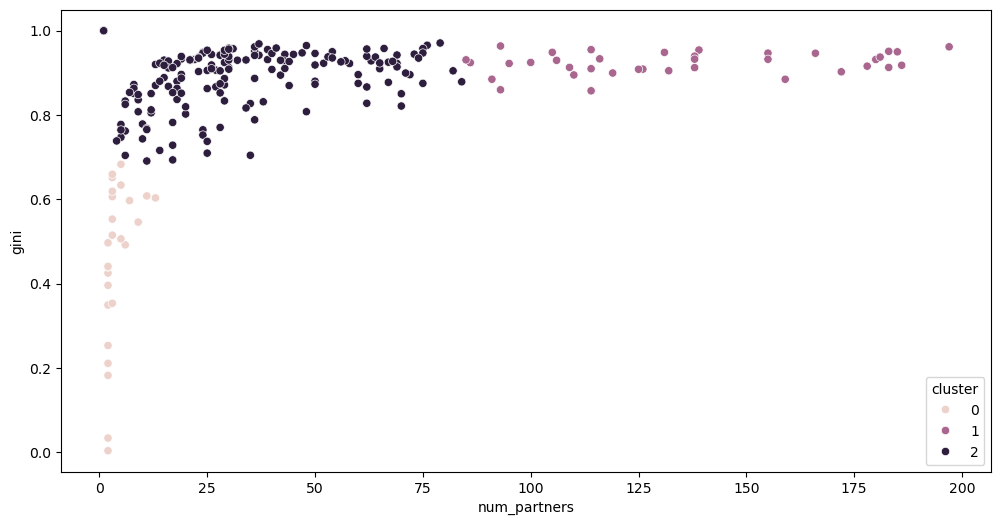

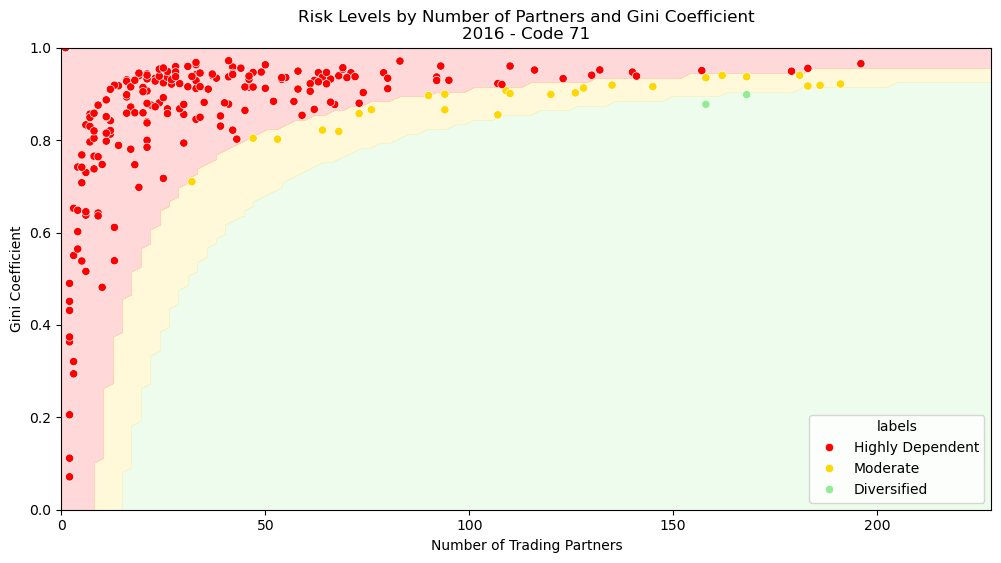

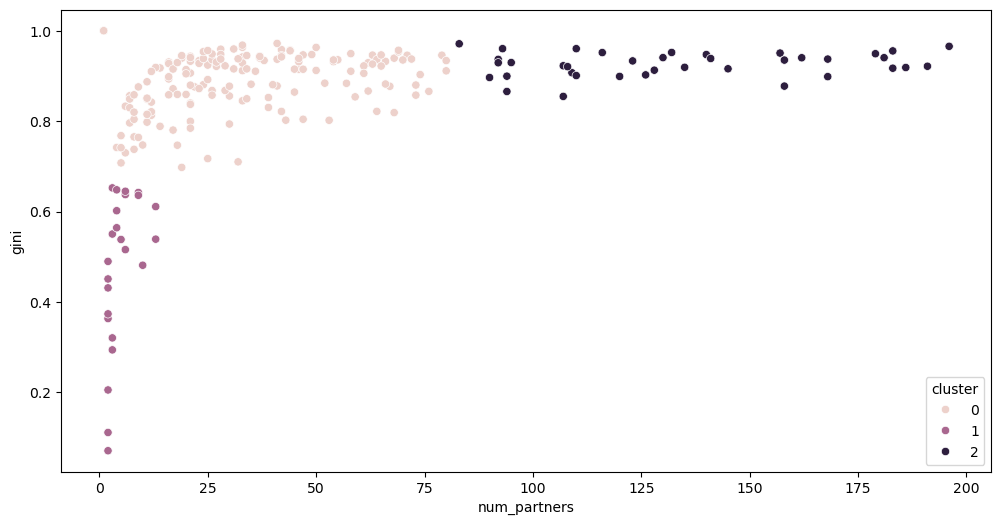

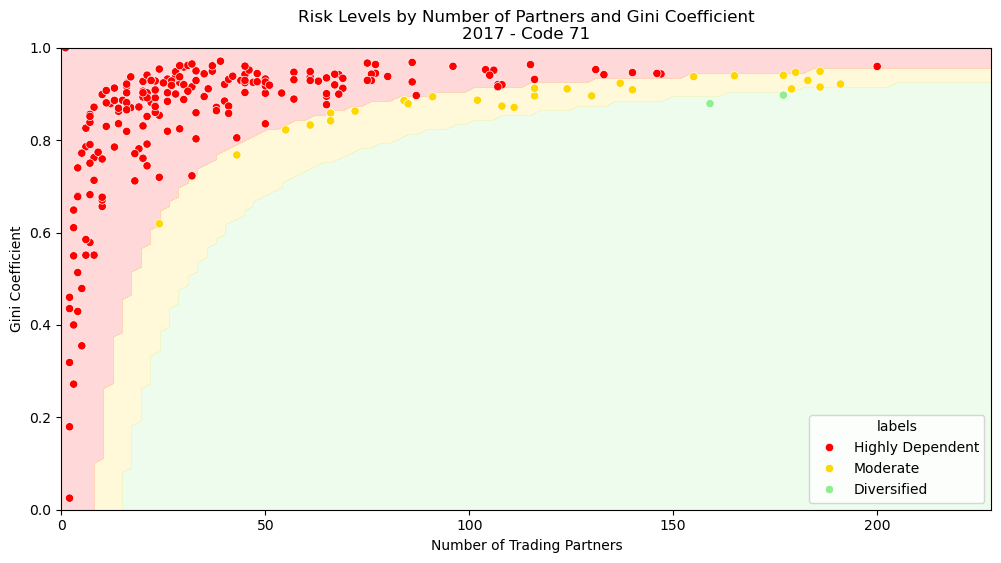

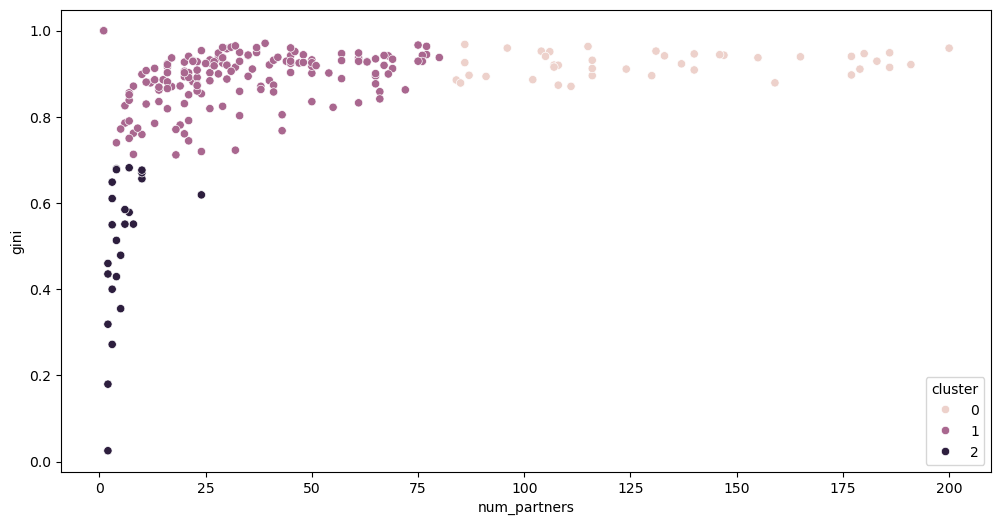

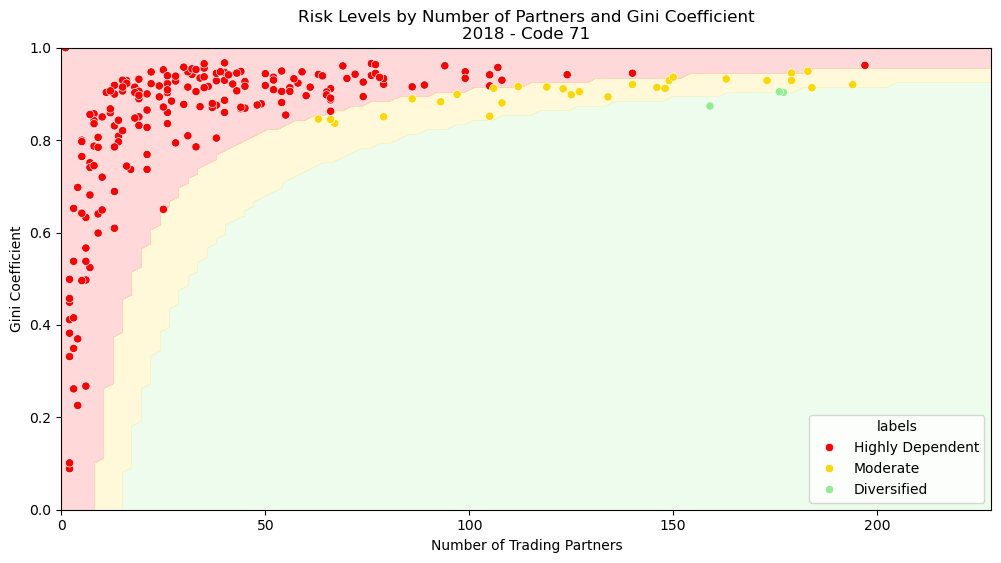

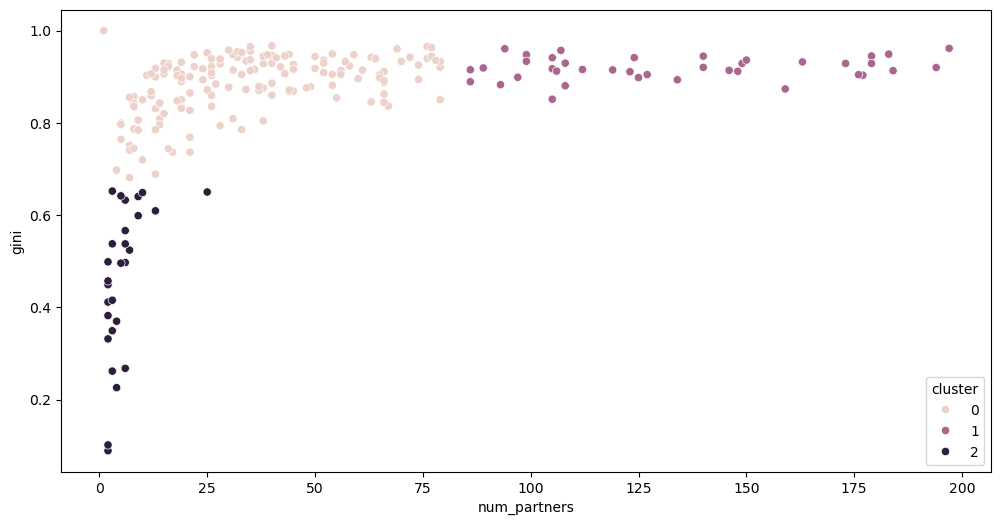

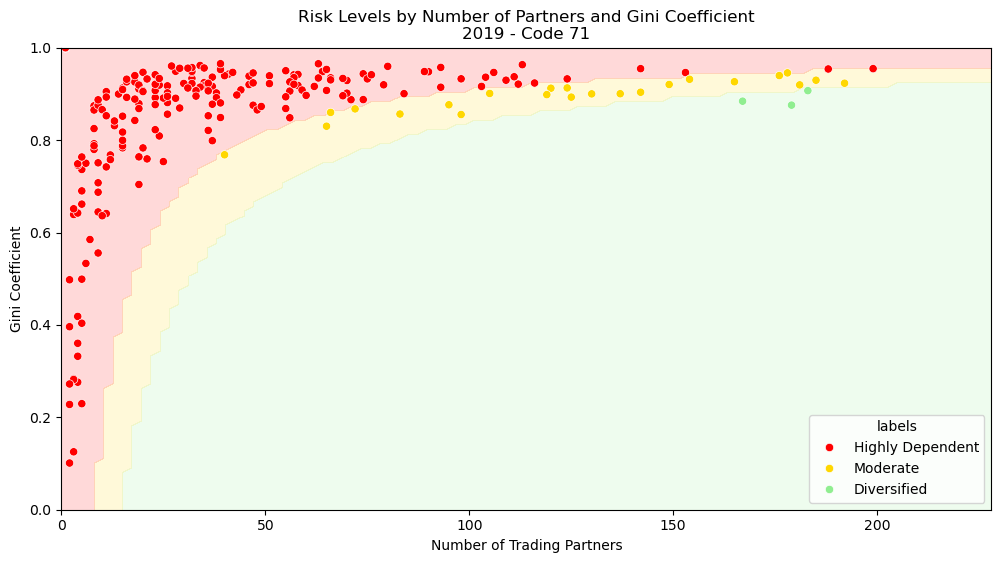

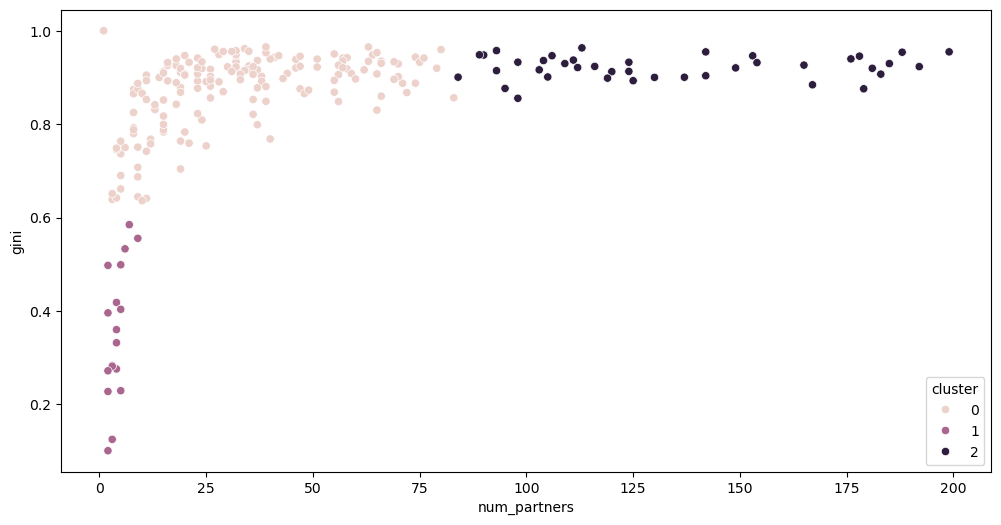

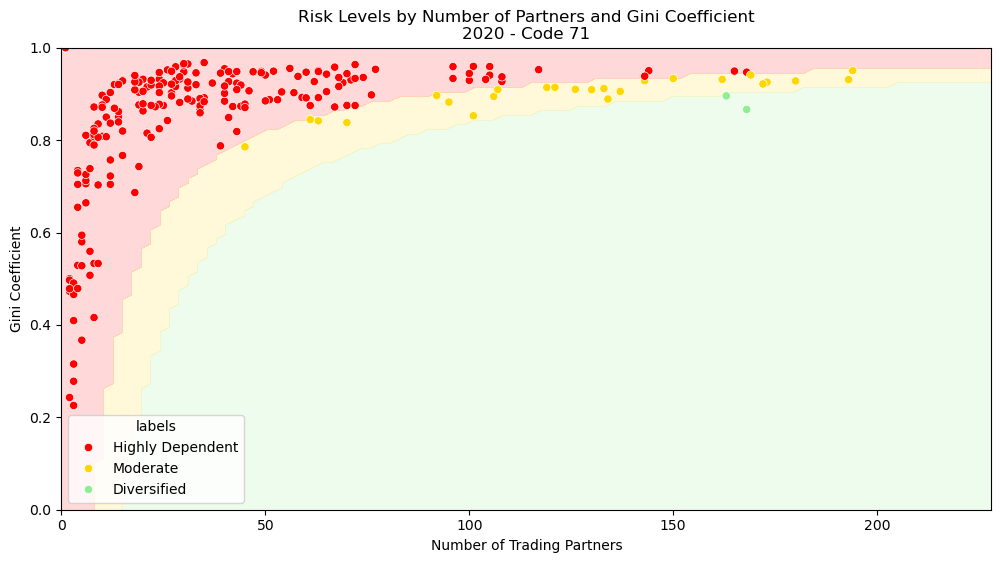

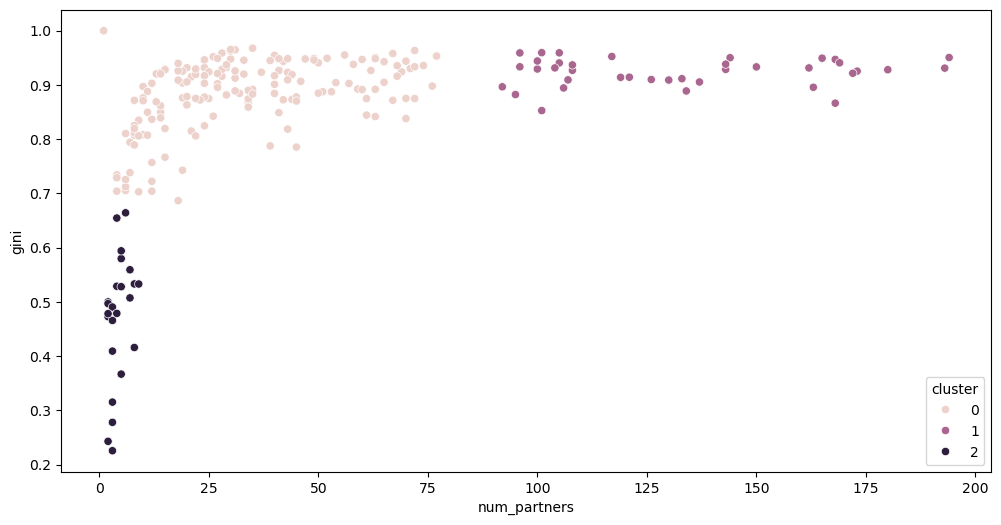

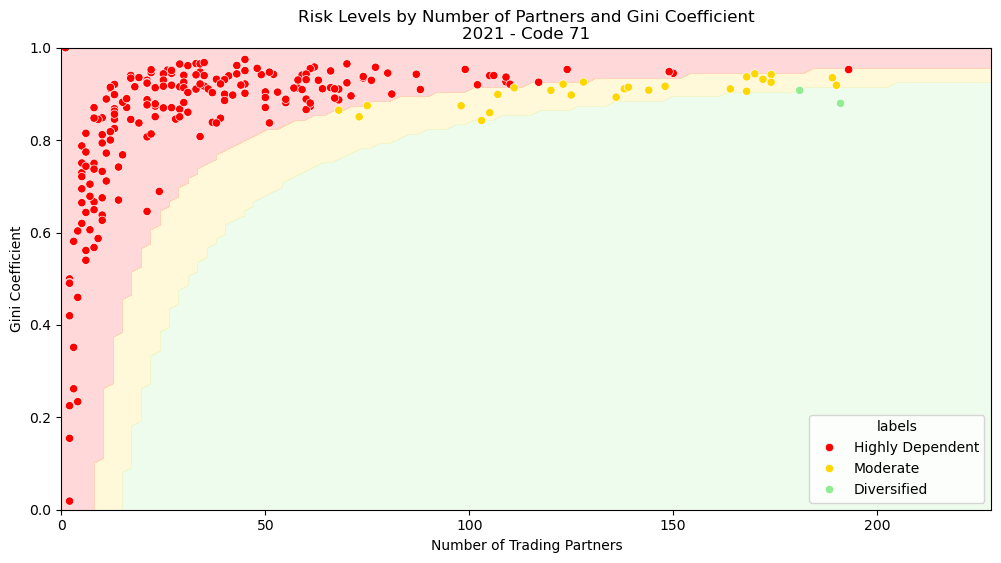

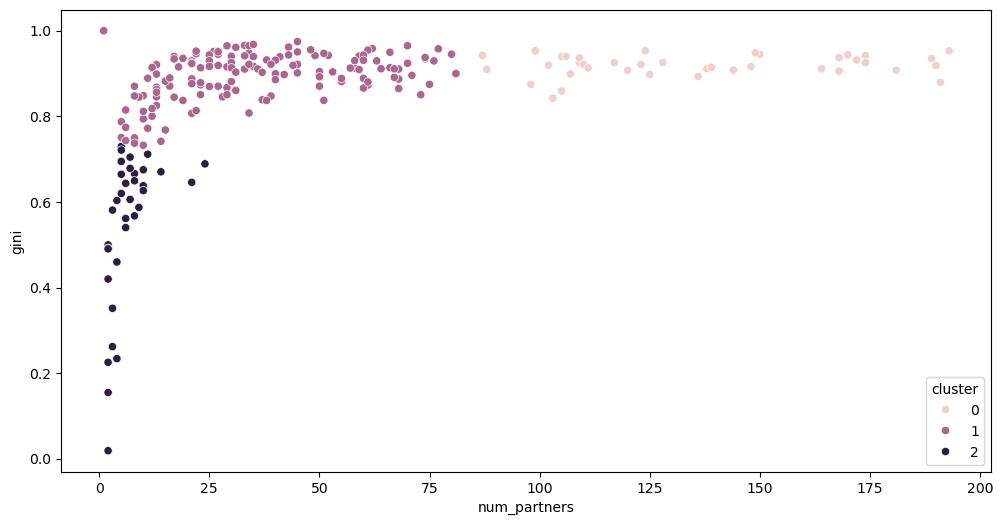

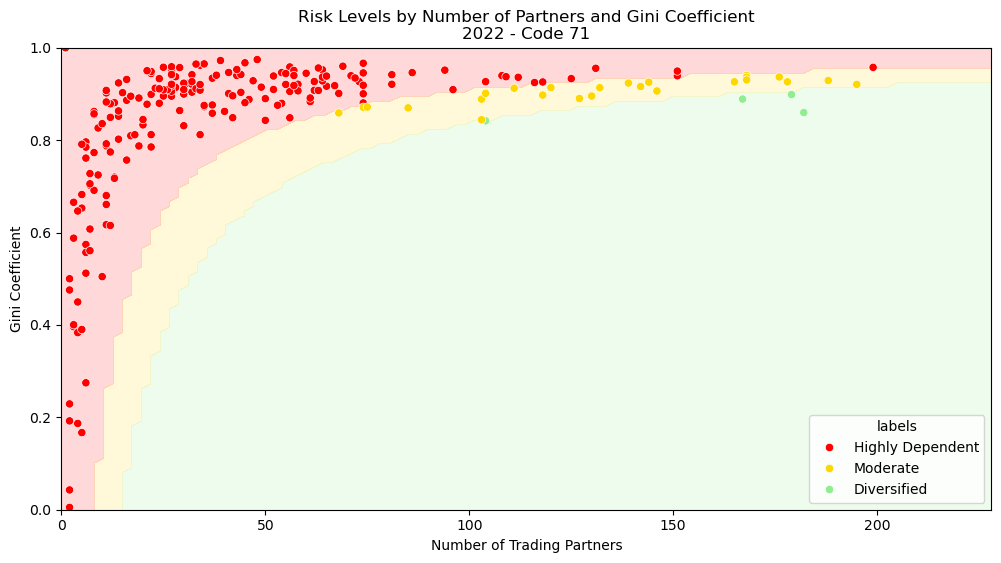

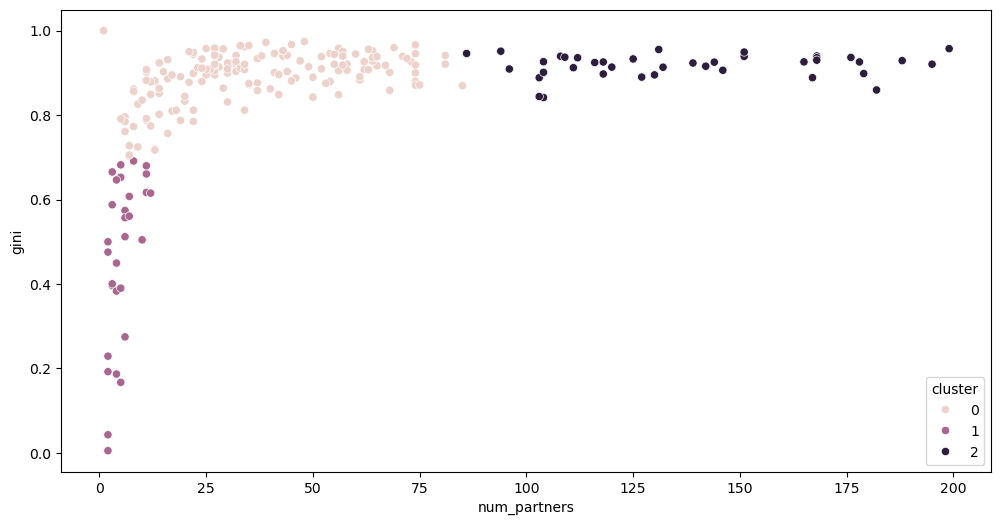

In [9]:
ks = []
for i, year in enumerate(range(2012, 2023)):
    year_subset = subset[subset.year==year]
    trade_volumes = get_total_trade(year_subset)
    trade_partners = get_trade_partners(year_subset)
    gini = trade_volumes.groupby("country_id")["total_trade"].apply(gini_coefficient).reset_index().rename(columns={"total_trade": "gini"})
    risk = trade_volumes.groupby("country_id")["total_trade"].apply(risk_score, alpha=alpha, N=N, beta=beta).reset_index().rename(columns={"total_trade": "risk"})
    risk["labels"] = risk.risk.apply(risk_label, risk_zones=risk_zones)
    df_risk = trade_partners.merge(gini, on="country_id", how="left").merge(risk, on="country_id", how="left")
    kmeans = KMeans(n_clusters=3)
    scaler = StandardScaler()
    df_risk["cluster"] = kmeans.fit_predict(scaler.fit_transform(df_risk[["num_partners", "gini"]]))

    fig, ax = plt.subplots(figsize=(12,6))
    # Plot filled contours for risk areas
    for label, color in colors.items():
        ax.contourf(N_partners, G, Risk_labels == label, levels=[0.5, 1.5], colors=[color], alpha=0.15)

    # Plot the scatter points
    sns.scatterplot(data=df_risk, x="num_partners", y="gini", hue="labels", ax=ax, palette=colors)

    plt.title(f"Risk Levels by Number of Partners and Gini Coefficient\n{year} - Code {product_code}")
    plt.xlabel("Number of Trading Partners")
    plt.ylabel("Gini Coefficient")
    #plt.show()

    fig, ax = plt.subplots(figsize=(12,6))
    sns.scatterplot(data=df_risk, x="num_partners", y="gini", hue="cluster", ax=ax)

In [11]:
def compute_hhi(trade_shares):
    """Compute Herfindahl-Hirschman Index given trade shares."""
    return np.sum(np.square(trade_shares))

In [25]:
# Include product code
subset_df = df.merge(products[["product_id", "code"]], how="left", on="product_id")
subset_df.rename(columns={"code": "product_code"}, inplace=True)
subset_df["product_code"] = subset_df.product_code.str[:2]

total_trades = []

for product_code in [f"{x:02d}" for x in range(1, 100)]:

    if product_code in ["77", "98", "99"]: # Not valid codes
        continue

    subset = subset_df[(subset_df.product_code == product_code)]

    for i, year in enumerate(range(2012, 2023)):
        year_subset = subset[subset.year==year]
        trade_volumes = get_total_trade(year_subset)
        trade_partners = get_trade_partners(year_subset)
        gini = trade_volumes.groupby("country_id")["total_trade"].apply(gini_coefficient).reset_index().rename(columns={"total_trade": "gini"})
        risk = trade_volumes.groupby("country_id")["total_trade"].apply(risk_score, alpha=alpha, N=N, beta=beta).reset_index().rename(columns={"total_trade": "risk"})
        risk["labels"] = risk.risk.apply(risk_label, risk_zones=risk_zones)
        df_risk = trade_partners.merge(gini, on="country_id", how="left").merge(risk, on="country_id", how="left")



In [27]:
trade_volumes.head(3)

,country_id,partner_country_id,export_value,import_value,total_trade
0,4,36,9256.0,0.0,9256.0
1,4,124,8326.0,0.0,8326.0
2,4,156,3711.0,0.0,3711.0


In [28]:
trade_volume_share = trade_volumes.merge(trade_volumes.groupby("country_id")["total_trade"].sum().reset_index().rename(columns={"total_trade": "total_country_trade"}),\
                                            on="country_id", how="left")
trade_volume_share["trade_share"] = trade_volume_share.total_trade / trade_volume_share.total_country_trade
trade_volume_share.head(3)

,country_id,partner_country_id,export_value,import_value,total_trade,total_country_trade,trade_share
0,4,36,9256.0,0.0,9256.0,1384517.0,0.006685
1,4,124,8326.0,0.0,8326.0,1384517.0,0.006014
2,4,156,3711.0,0.0,3711.0,1384517.0,0.002680


In [29]:
risk_hhi = trade_volume_share.groupby("country_id")["trade_share"].apply(compute_hhi).reset_index().rename(columns={"trade_share": "risk"})

In [30]:
risk_hhi

,country_id,risk
0,4,0.672292
1,8,0.147615
2,12,0.399951
3,16,1.000000
4,20,0.648496
...,...,...
220,862,0.440683
221,882,0.358162
222,887,0.353845
223,894,0.257288


In [31]:
np.corrcoef(risk_hhi.risk, risk.risk)

array([[1.        , 0.87173922],
       [0.87173922, 1.        ]])

In [32]:
from scipy.stats import pearsonr, spearmanr
print(pearsonr(risk_hhi.risk, risk.risk))
print(spearmanr(risk_hhi.risk, risk.risk))

PearsonRResult(statistic=0.8717392226016563, pvalue=4.944567458367197e-71)
SignificanceResult(statistic=0.940690271417402, pvalue=1.15948418561872e-106)


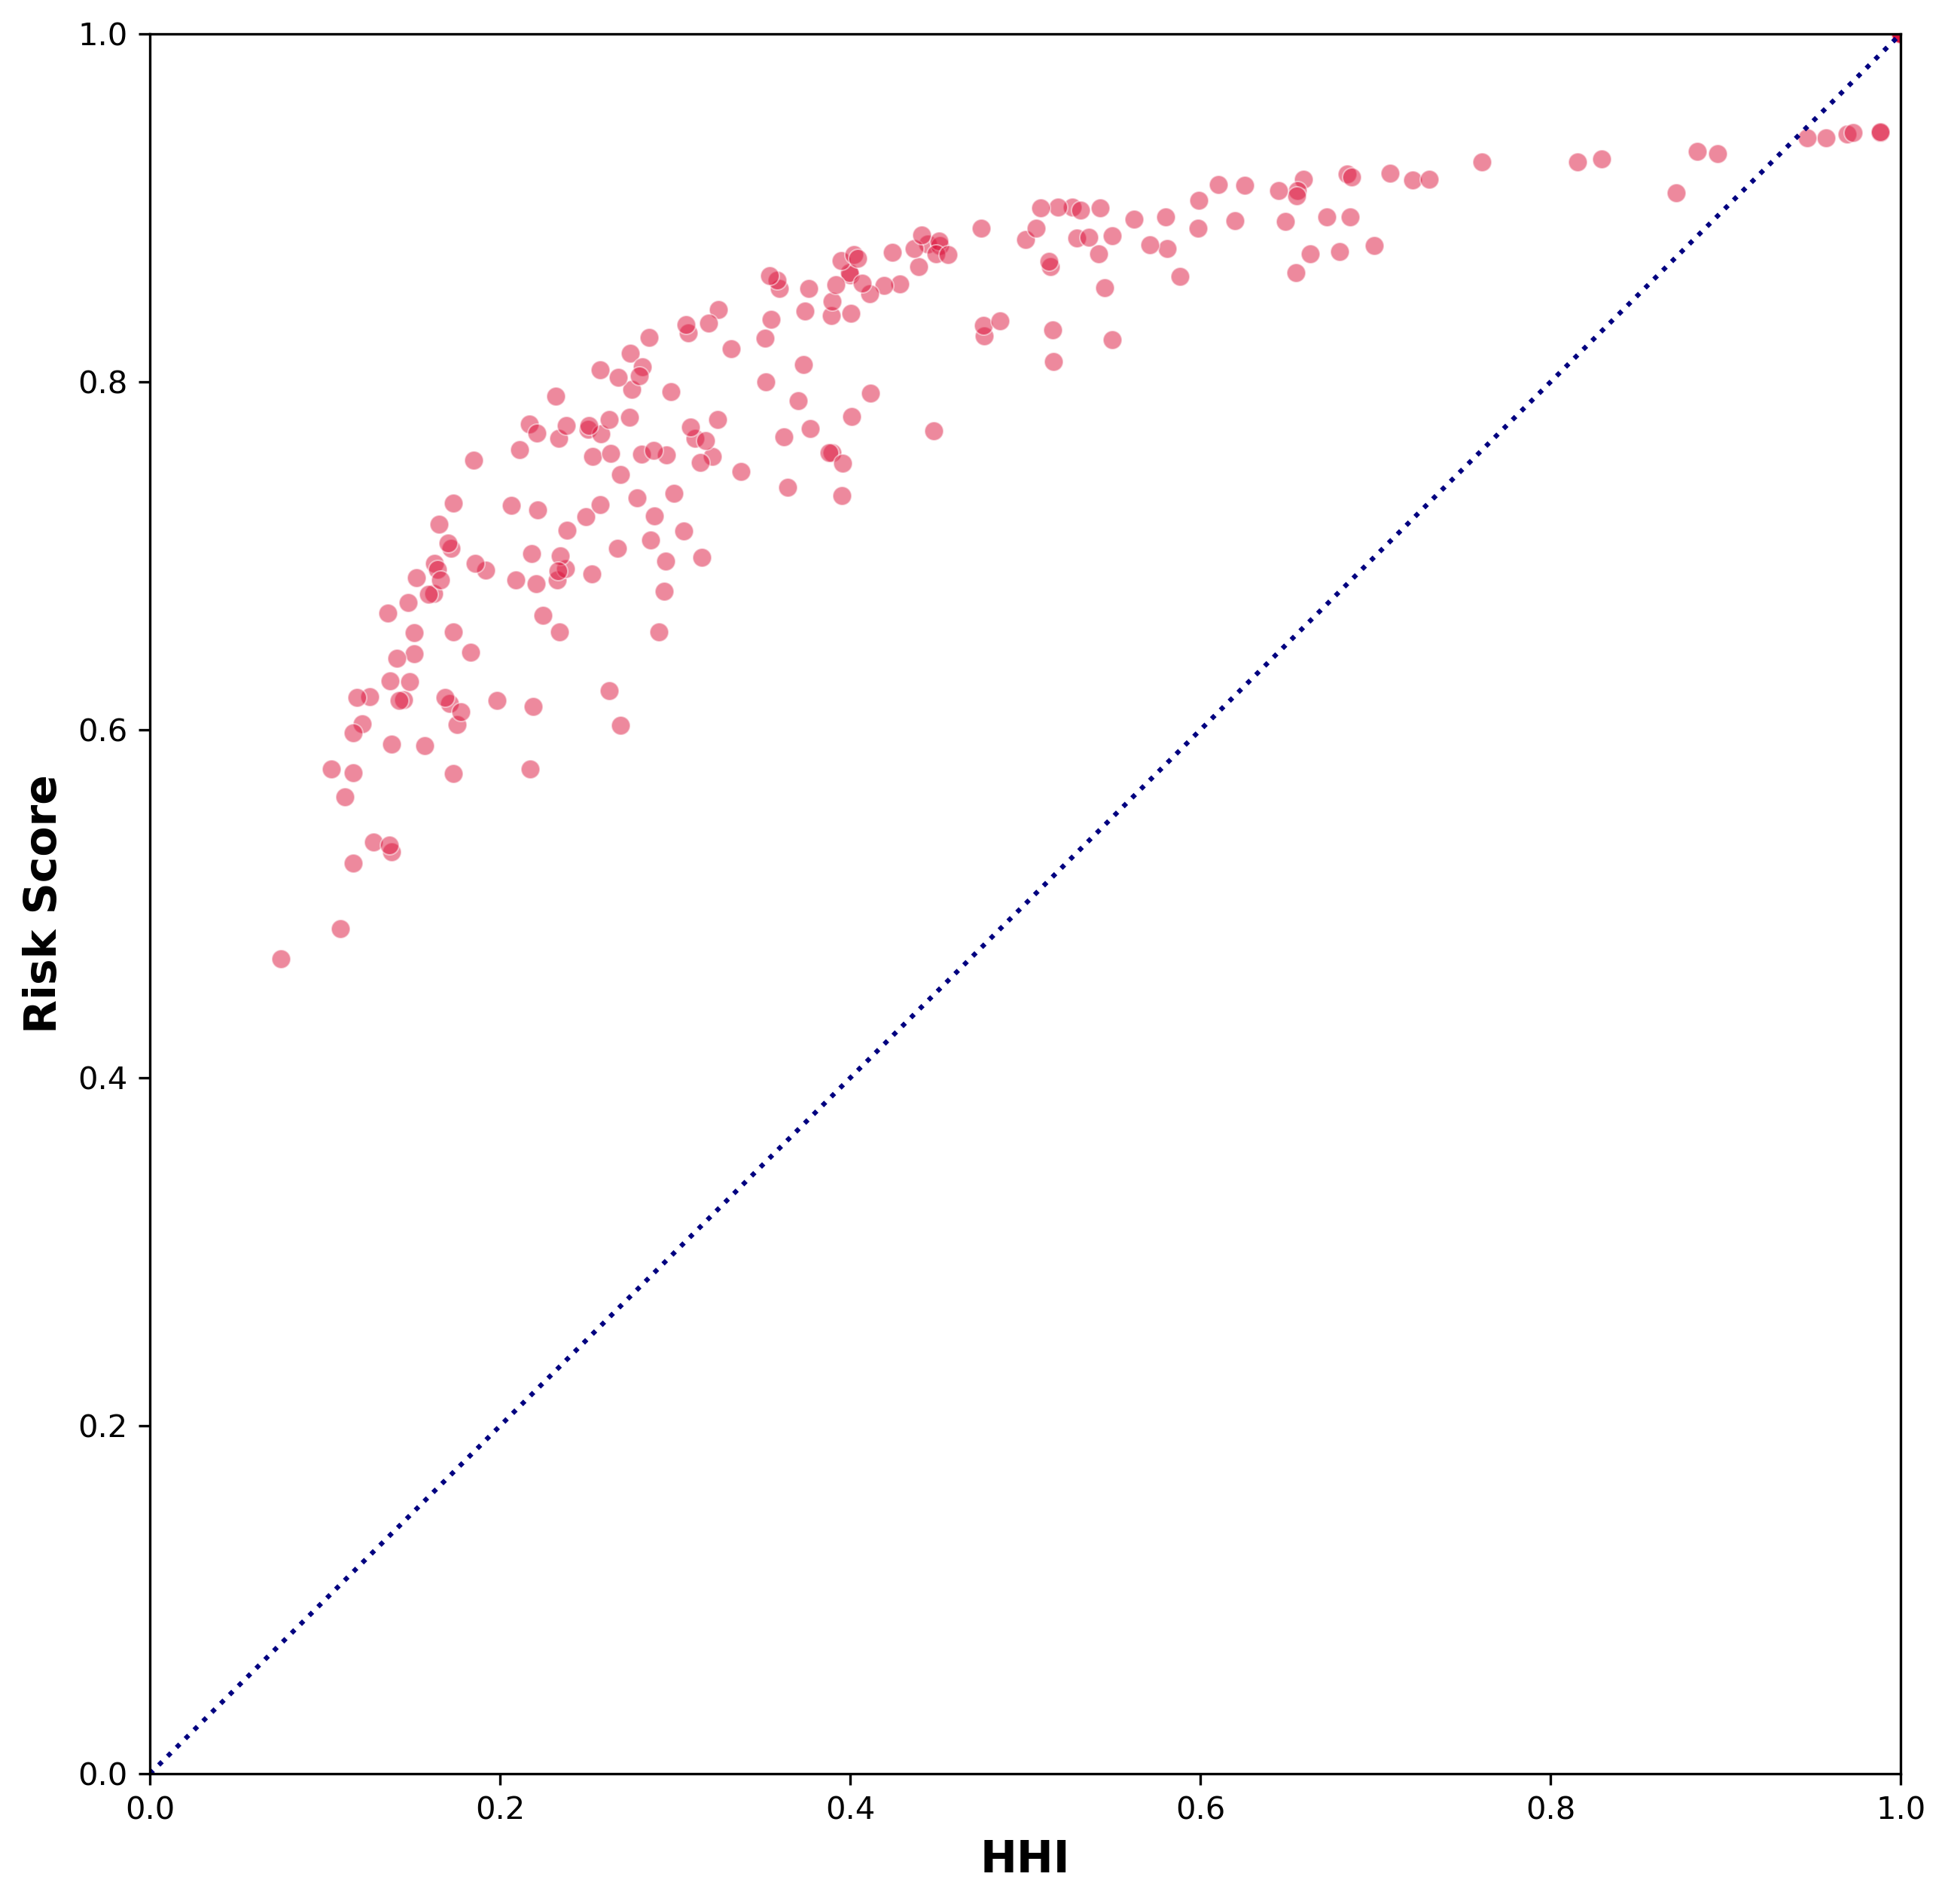

In [33]:
fig, ax = plt.subplots(figsize=(10,10), dpi=300)

sns.scatterplot(x=risk_hhi.risk, y=risk.risk, ax=ax, c="crimson", alpha=0.5)
sns.lineplot(x=[0, 1], y=[0, 1], color="navy", linestyle=":", ax=ax)
plt.xlabel("HHI", fontsize=14, fontweight='bold')
plt.ylabel("Risk Score", fontsize=14, fontweight='bold')
#plt.axhline(0.4, linestyle="--")
#plt.axhline(0.6, linestyle="--")
#plt.axvline(0.15, linestyle="--", color="red")
#plt.axvline(0.25, linestyle="--", color="red")
#plt.fill_between([0, 0.15], y1=0, y2=0.4, alpha=0.1, color="green")
#plt.fill_between([0.15, 0.25], y1=0.4, y2=0.6, alpha=0.1, color="green")
#plt.fill_between([0.25, 1], y1=0.6, y2=1, alpha=0.1, color="green")
#plt.fill_between([0, 0.15], y1=0.4, y2=0.6, alpha=0.1, color="red")
#plt.fill_between([0.15, 0.25], y1=0.6, y2=1, alpha=0.1, color="red")
plt.xlim(0, 1)
plt.ylim(0, 1);

In [34]:
trade_volume_share[trade_volume_share.country_id == 162]

,country_id,partner_country_id,export_value,import_value,total_trade,total_country_trade,trade_share
1473,162,36,0.0,2267.0,2267.0,569493.0,0.003981
1474,162,702,1047.0,0.0,1047.0,569493.0,0.001838
1475,162,840,6079.0,560100.0,566179.0,569493.0,0.994181


In [35]:
risk_hhi[risk_hhi.risk == 1]

,country_id,risk
3,16,1.0
78,296,1.0
105,408,1.0
130,500,1.0
142,548,1.0
149,580,1.0
150,581,1.0
153,585,1.0
168,652,1.0
171,660,1.0
